# Modelo global do campo de gravidade eigen6c4

Este script mostra algumas quantidades preditas pelo modelo global do campo de gravidade **eigen-6C4** (Förste et al., 2014). Os coeficientes que descrevem este modelo estão no arquivo `eigen-6c4.gfc`, que pode ser baixado no site do IGCEM, na página [Table of models](http://icgem.gfz-potsdam.de/ICGEM/modelstab.html).

* Förste C., Bruinsma S.L., Abrikosov O., Lemoine J.-M., Schaller T., Götze H.-J., Ebbing J., Marty J.C., Flechtner F., Balmino G., Biancale R., 2014, EIGEN-6C4 The latest combined global gravity field model including GOCE data up to degree and order 2190 of GFZ Potsdam and GRGS Toulouse, 5th GOCE User Workshop, Paris, 25-28 November 2014, url: http://icgem.gfz-potsdam.de/ICGEM/documents/Foerste-et-al-EIGEN-6C4.pdf

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import minhas_funcoes as mf

### Dados baixados no IGCEM

In [2]:
topografia = np.loadtxt('etopo1-18001.gdf.txt', skiprows=29)

In [3]:
disturbio = np.loadtxt('eigen-6c4-18000.gdf.txt', skiprows=35)

In [4]:
gravidade = np.loadtxt('eigen-6c4-18026.gdf.txt', skiprows=34)

In [5]:
geoide = np.loadtxt('eigen-6c4-18031.gdf.txt', skiprows=36)

### Coordenadas x y da projeção cartográfica

A projeção foi calculada com o [Basemap](http://matplotlib.org/basemap/users/index.html). Para os exemplos mostrados abaixo, a projeção escolhida foi a de [Robinson](http://matplotlib.org/basemap/users/robin.html).

In [6]:
m = Basemap(projection='robin',lon_0=0,resolution='c')
x, y = m(disturbio[:,0], disturbio[:,1])

### Parâmetros do datum geodésico WGS84

In [7]:
a, f, GM, omega = mf.WGS84()

### Gravidade normal sobre o elipsoide ($\mathbf{\gamma}_{0}$), sobre a topografia ($\mathbf{\gamma}$) e uma aproximação sobre a topografia ($\mathbf{\gamma}_{aprox}$)

In [8]:
gamma0 = mf.gamma_closedform(a, f, GM, omega, disturbio[:,1], 
                             np.zeros_like(disturbio[:,2]))

In [9]:
gamma = mf.gamma_closedform(a, f, GM, omega, disturbio[:,1], disturbio[:,2])

In [10]:
gamma_aproximado = gamma0 - 0.3086*disturbio[:,2]

### Distúrbio de gravidade calculado $\delta g_{calc}$

In [11]:
disturbio_calculado = gravidade[:,3] - gamma

### Estatísticas e "mapas"

In [12]:
geoide_medio = np.mean(geoide[:,2])
geoide_min = np.min(geoide[:,2])
geoide_max = np.max(geoide[:,2])
dgeoide = geoide_max - geoide_min

print '     min.: %15.5f mGal' % geoide_min
print '    media: %15.5f mGal' % geoide_medio
print '     max.: %15.5f mGal' % geoide_max
print 'var. max.: %15.5f mGal' % dgeoide

     min.:      -106.18443 mGal
    media:        -0.86917 mGal
     max.:        84.91729 mGal
var. max.:       191.10172 mGal


C:\Anaconda\lib\site-packages\matplotlib\tri\triangulation.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self._neighbors)


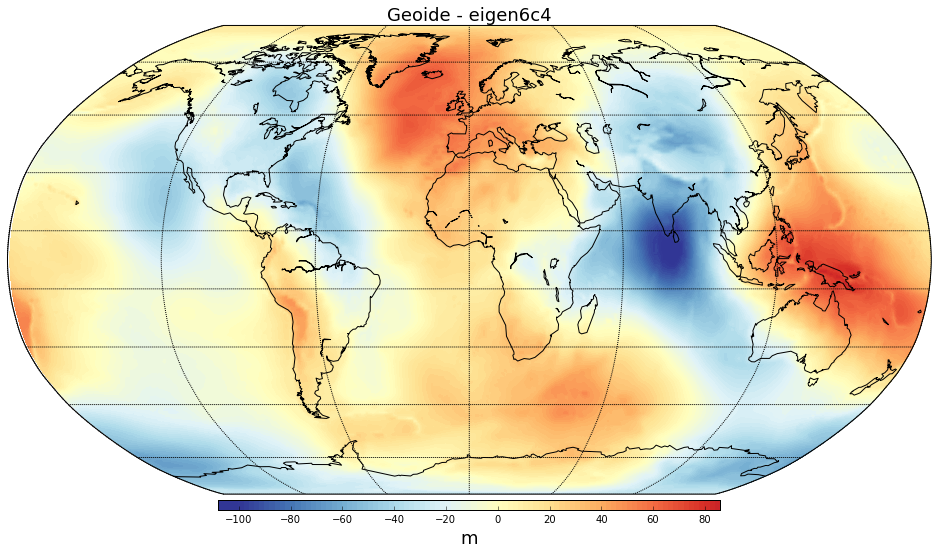

In [13]:
plt.figure(figsize=(18, 10))
plt.title('Geoide - eigen6c4', fontsize=18)
m.contourf(x, y, geoide[:,2], 100, tri=True, cmap=plt.cm.RdYlBu_r,
          vmin = -100., vmax = 100.)
plt.colorbar(orientation='horizontal', pad=0.01, aspect=50, 
             shrink=0.5).set_label('m', fontsize=18)
m.drawcoastlines()
m.drawparallels(np.arange(-90.,90.,20.))
m.drawmeridians(np.arange(0.,360.,60.))
plt.show()

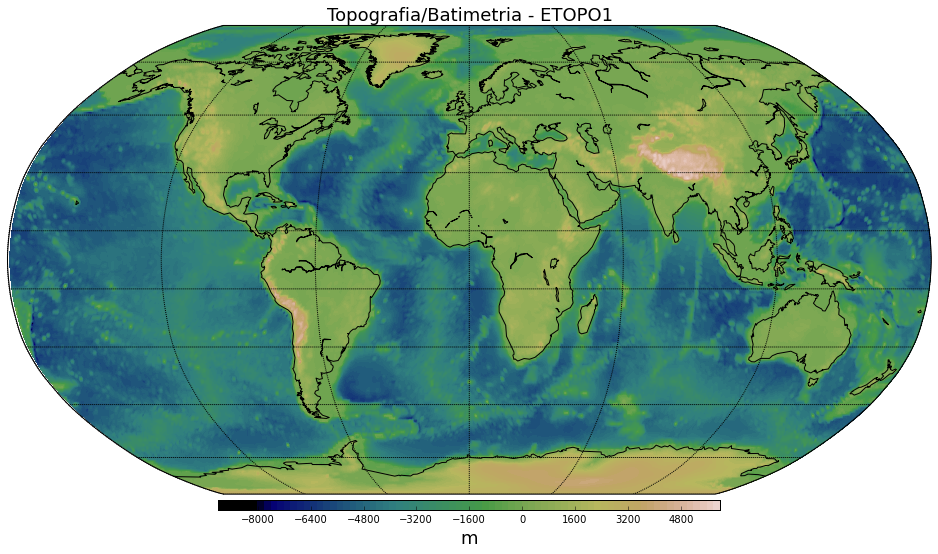

In [14]:
plt.figure(figsize=(18, 10))
plt.title('Topografia/Batimetria - ETOPO1', fontsize=18)
m.contourf(x, y, topografia[:,2], 100, tri=True, cmap=plt.cm.gist_earth,
          vmin = -8000., vmax = 6800.)
plt.colorbar(orientation='horizontal', pad=0.01, aspect=50, 
             shrink=0.5).set_label('m', fontsize=18)
m.drawcoastlines()
m.drawparallels(np.arange(-90.,90.,20.))
m.drawmeridians(np.arange(0.,360.,60.))
plt.show()

In [15]:
gamma_medio = np.mean(gamma)
gamma_min = np.min(gamma)
gamma_max = np.max(gamma)
dgamma = gamma_max - gamma_min

print '     min.: %15.5f mGal' % gamma_min
print '    media: %15.5f mGal' % gamma_medio
print '     max.: %15.5f mGal' % gamma_max
print 'var. max.: %15.5f mGal' % dgamma

     min.:    976617.37984 mGal
    media:    980519.41489 mGal
     max.:    983218.49379 mGal
var. max.:      6601.11395 mGal


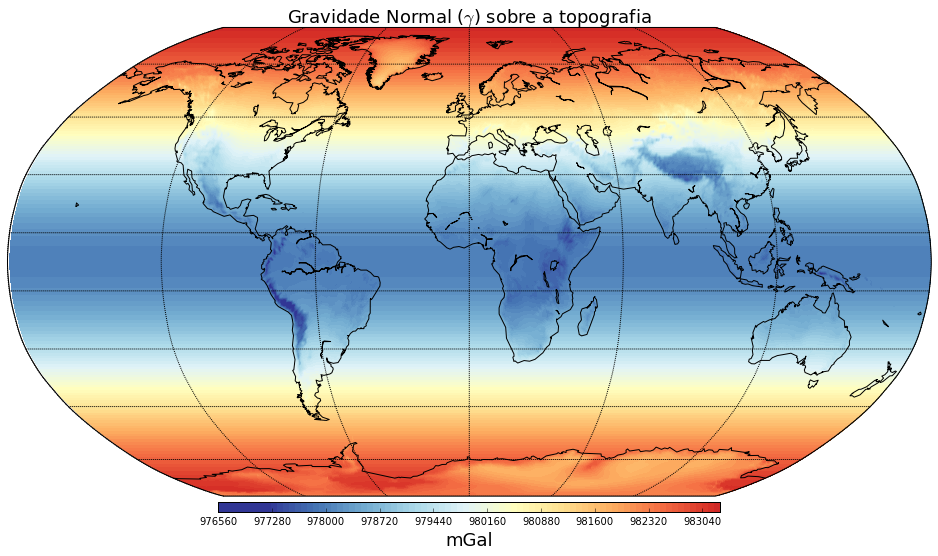

In [16]:
plt.figure(figsize=(18, 10))
plt.title('Gravidade Normal ($\gamma$) sobre a topografia', fontsize=18)
m.contourf(x, y, gamma, 100, tri=True, cmap=plt.cm.RdYlBu_r,
          vmin = gamma_medio - 0.5*dgamma, vmax = gamma_medio + 0.5*dgamma)
plt.colorbar(orientation='horizontal', pad=0.01, aspect=50, 
             shrink=0.5).set_label('mGal', fontsize=18)
m.drawcoastlines()
m.drawparallels(np.arange(-90.,90.,20.))
m.drawmeridians(np.arange(0.,360.,60.))
plt.show()

In [17]:
gamma_aprox_medio = np.mean(gamma_aproximado)
gamma_aprox_min = np.min(gamma_aproximado)
gamma_aprox_max = np.max(gamma_aproximado)
dgamma_aprox = gamma_aprox_max - gamma_aprox_min

print '     min.: %15.5f mGal' % gamma_aprox_min
print '    media: %15.5f mGal' % gamma_aprox_medio
print '     max.: %15.5f mGal' % gamma_aprox_max
print 'var. max.: %15.5f mGal' % dgamma_aprox

     min.:    976616.67679 mGal
    media:    980519.29420 mGal
     max.:    983218.49379 mGal
var. max.:      6601.81700 mGal


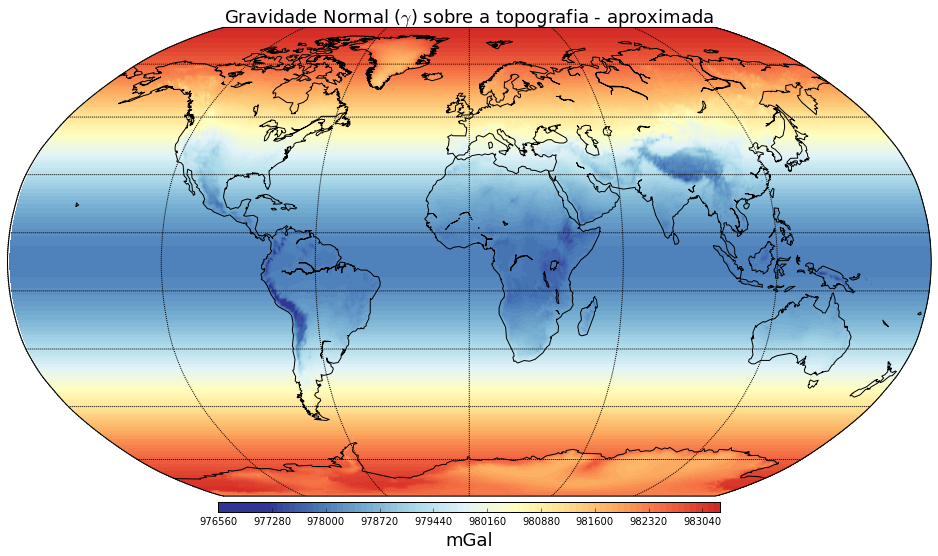

In [18]:
plt.figure(figsize=(18, 10))
plt.title('Gravidade Normal ($\gamma$) sobre a topografia - aproximada', fontsize=18)
m.contourf(x, y, gamma_aproximado, 100, tri=True, cmap=plt.cm.RdYlBu_r,
          vmin = gamma_medio - 0.5*dgamma, vmax = gamma_medio + 0.5*dgamma)
plt.colorbar(orientation='horizontal', pad=0.01, aspect=50, 
             shrink=0.5).set_label('mGal', fontsize=18)
m.drawcoastlines()
m.drawparallels(np.arange(-90.,90.,20.))
m.drawmeridians(np.arange(0.,360.,60.))
plt.show()

In [19]:
gamma0_medio = np.mean(gamma0)
gamma0_min = np.min(gamma0)
gamma0_max = np.max(gamma0)
dgamma0 = gamma0_max - gamma0_min

print '     min.: %15.5f mGal' % gamma0_min
print '    media: %15.5f mGal' % gamma0_medio
print '     max.: %15.5f mGal' % gamma0_max
print 'var. max.: %15.5f mGal' % dgamma0

     min.:    978032.53359 mGal
    media:    980636.98701 mGal
     max.:    983218.49379 mGal
var. max.:      5185.96020 mGal


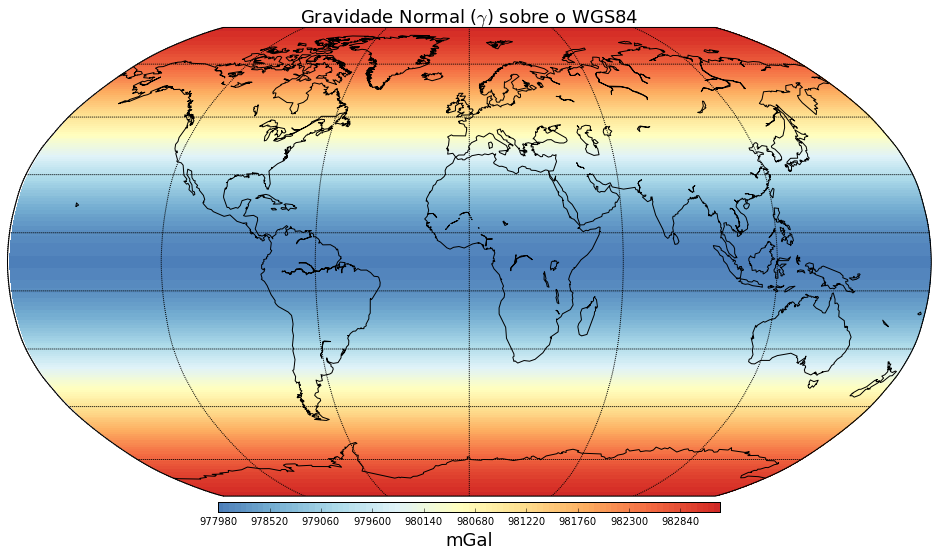

In [20]:
plt.figure(figsize=(18, 10))
plt.title('Gravidade Normal ($\gamma$) sobre o WGS84', fontsize=18)
m.contourf(x, y, gamma0, 100, tri=True, cmap=plt.cm.RdYlBu_r,
          #vmin = gamma0_medio - 0.5*dgamma0, vmax = gamma0_medio + 0.5*dgamma0)
           vmin = gamma_medio - 0.5*dgamma, vmax = gamma_medio + 0.5*dgamma)
plt.colorbar(orientation='horizontal', pad=0.01, aspect=50, 
             shrink=0.5).set_label('mGal', fontsize=18)
m.drawcoastlines()
m.drawparallels(np.arange(-90.,90.,20.))
m.drawmeridians(np.arange(0.,360.,60.))
plt.show()

In [21]:
grav_media = np.mean(gravidade[:,3])
grav_min = np.min(gravidade[:,3])
grav_max = np.max(gravidade[:,3])
dgrav = grav_max - grav_min

print '     min.: %15.5f mGal' % grav_min
print '    media: %15.5f mGal' % grav_media
print '     max.: %15.5f mGal' % grav_max
print 'var. max.: %15.5f mGal' % dgrav

     min.:    976832.72204 mGal
    media:    980518.95501 mGal
     max.:    983296.63864 mGal
var. max.:      6463.91660 mGal


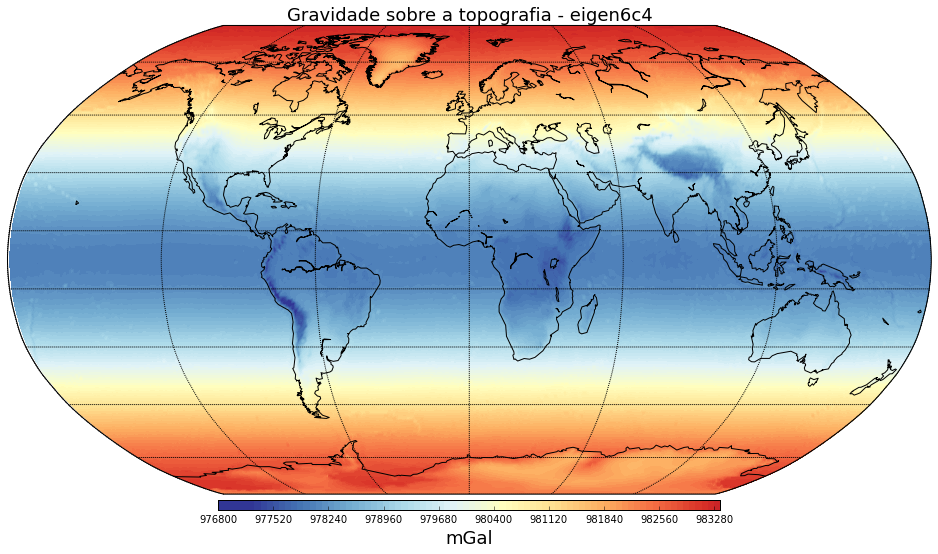

In [22]:
plt.figure(figsize=(18, 10))
plt.title('Gravidade sobre a topografia - eigen6c4', fontsize=18)
m.contourf(x, y, gravidade[:,3], 100, tri=True, cmap=plt.cm.RdYlBu_r,
          #vmin = grav_media - 0.5*dgrav, vmax = grav_media + 0.5*dgrav)
          vmin = gamma_medio - 0.5*dgamma, vmax = gamma_medio + 0.5*dgamma)
plt.colorbar(orientation='horizontal', pad=0.01, aspect=50, 
             shrink=0.5).set_label('mGal', fontsize=18)
m.drawcoastlines()
m.drawparallels(np.arange(-90.,90.,20.))
m.drawmeridians(np.arange(0.,360.,60.))
plt.show()

In [23]:
dist_medio_calculado = np.mean(disturbio_calculado)
dist_min_calculado = np.min(disturbio_calculado)
dist_max_calculado = np.max(disturbio_calculado)
ddist_calculado = dist_max_calculado - dist_min_calculado

print '     min.: %15.5f mGal' % dist_min_calculado
print '    media: %15.5f mGal' % dist_medio_calculado
print '     max.: %15.5f mGal' % dist_max_calculado
print 'var. max.: %15.5f mGal' % ddist_calculado

     min.:      -301.30098 mGal
    media:        -0.45988 mGal
     max.:       384.91454 mGal
var. max.:       686.21552 mGal


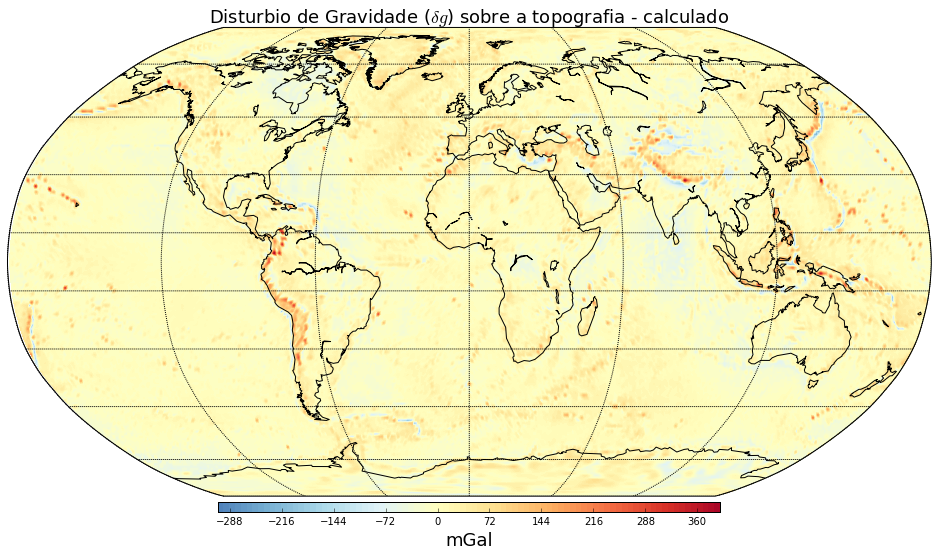

In [24]:
plt.figure(figsize=(18, 10))
plt.title('Disturbio de Gravidade ($\delta g$) sobre a topografia - calculado', fontsize=18)
m.contourf(x, y, disturbio_calculado, 100, tri=True, cmap=plt.cm.RdYlBu_r,
          vmin = -400., vmax = 400.)
plt.colorbar(orientation='horizontal', pad=0.01, aspect=50, 
             shrink=0.5).set_label('mGal', fontsize=18)
m.drawcoastlines()
m.drawparallels(np.arange(-90.,90.,20.))
m.drawmeridians(np.arange(0.,360.,60.))
plt.show()

In [25]:
dist_medio_eigen6c4 = np.mean(disturbio[:,3])
dist_min_eigen6c4 = np.min(disturbio[:,3])
dist_max_eigen6c4 = np.max(disturbio[:,3])
ddist_eigen6c4 = dist_max_eigen6c4 - dist_min_eigen6c4

print '     min.: %15.5f mGal' % dist_min_eigen6c4
print '    media: %15.5f mGal' % dist_medio_eigen6c4
print '     max.: %15.5f mGal' % dist_max_eigen6c4
print 'var. max.: %15.5f mGal' % ddist_eigen6c4

     min.:      -302.16113 mGal
    media:        -0.72717 mGal
     max.:       394.95950 mGal
var. max.:       697.12063 mGal


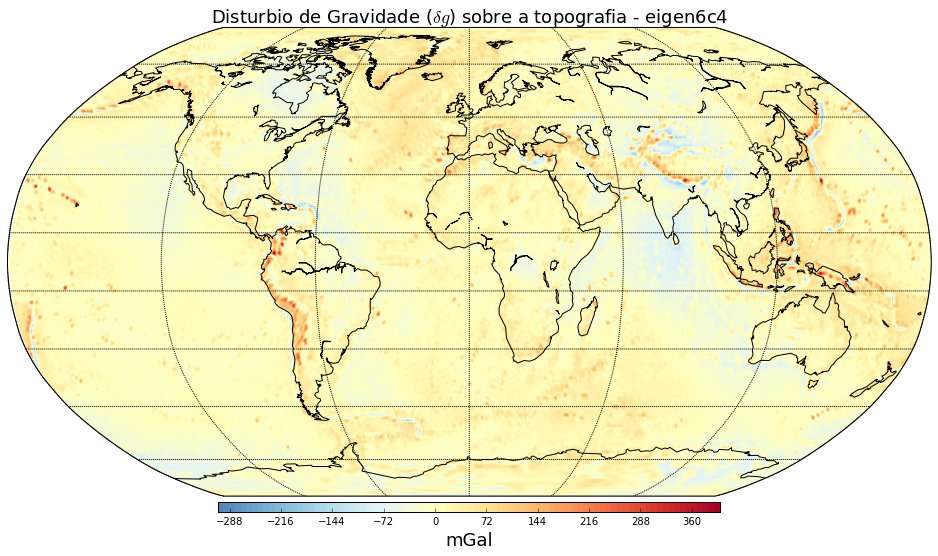

In [26]:
plt.figure(figsize=(18, 10))
plt.title('Disturbio de Gravidade ($\delta g$) sobre a topografia - eigen6c4', fontsize=18)
m.contourf(x, y, disturbio[:,3], 100, tri=True, cmap=plt.cm.RdYlBu_r,
          vmin = -400., vmax = 400.)
plt.colorbar(orientation='horizontal', pad=0.01, aspect=50, 
             shrink=0.5).set_label('mGal', fontsize=18)
m.drawcoastlines()
m.drawparallels(np.arange(-90.,90.,20.))
m.drawmeridians(np.arange(0.,360.,60.))
plt.show()